In [1]:
!pip install --user --upgrade google-api-python-client

In [ ]:
pip install xgboost

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import missingno as msno 
import numpy as np
#import pandas_gbq
from google.cloud import bigquery
from functions import *
from sklearn.model_selection import train_test_split

%reload_ext google.cloud.bigquery
# Set your default project here
#pandas_gbq.context.project = 'bigquery-public-data'
#pandas_gbq.context.dialect = 'standard'
# set display options to show all columns
pd.set_option('display.max_columns', None)
# Set the float format to display numbers without scientific notation
pd.options.display.float_format = '{:.2f}'.format
# Set the client for future queries to BigQuery
client = bigquery.Client(project = "continente-lced-feup")

In [3]:
!gcloud auth application-default login

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8085%2F&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=oj0nBzBVKwwRKktBqXbPXMKb62OBeU&access_type=offline&code_challenge=zPxVcfUcbIjRGACfsqDUcLgaGthTsYCPNHowGGKF3wE&code_challenge_method=S256


Credentials saved to file: [C:\Users\cmigu\AppData\Roaming\gcloud\application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).

Quota project "continente-lced-feup" was added to ADC which can be used by Google client libraries for billing and quota. Note that some services may still bill the project

In [4]:
query = client.query("""
   SELECT *
   FROM 
       tables_raw.dim_customer 
       JOIN tables_raw.fact_transaction USING(CUSTOMER_ACCOUNT_NR_MASK)
       JOIN tables_raw.dim_product USING(SKU)
    WHERE 
        SUBCAT_CD_EXT IN (140304, 50401, 30301, 20201, 10301, 80103, 60102, 60401, 30401, 10101, 100102, 100204, 140204, 
        20302, 30201, 50203, 90201, 170101, 80404, 50402, 70202, 100201, 80409, 10303, 20306, 80411, 10102, 20305, 60105, 80110, 
        140301, 30202, 90202, 100101, 80105, 80104, 50202, 50303, 70204, 60306, 80403, 10302, 10201, 80405, 170304, 170303, 80406, 
        140201, 60302, 30403, 30304, 20204, 170106, 140205, 10204, 60404, 50301, 50302, 20205, 60406, 20301, 80407, 20203, 70201, 100205,
        60106, 170302, 50201, 60301, 10205, 30203, 80401, 100202, 30302, 170111, 10202, 70203, 60303, 170109, 60403, 30402, 140302, 30208, 60307, 
        80107, 50403, 60103, 20307, 60305, 60101, 170307, 80414, 80415, 60405, 20303, 80402, 30204, 30206, 170310, 60304, 140206, 10203, 30205, 60107, 
        70206, 170108, 90203, 90204, 30207, 140303, 30303, 80408, 140202, 50304, 80101, 170313, 100203, 60402, 170305, 50305, 50404, 20202, 170110, 
        170105, 170112, 170301, 10206, 10208, 20304, 80102, 70205, 10207, 10305, 170309, 170114, 80111, 90206, 30306, 30305, 140203, 80413) 
        AND SEG_AGE_DSC = ']25;35]'
        AND QTY>=0
    ORDER BY 
        CUSTOMER_ACCOUNT_NR_MASK DESC, TIME_KEY ASC
   --LIMIT 1000
   """)

df = query.result().to_dataframe() # Wait for the job to complete.
df

,SKU,CUSTOMER_ACCOUNT_NR_MASK,GENDER,FAMILY_MEMBERS,CP4,seg_lifestyle_cd,seg_lifestyle_dsc,SEG_AGE,SEG_AGE_DSC,seg_lifestage_cd,seg_lifestage_dsc,TIME_KEY,TRANSACTION_ID_MASK,LOC_BRAND_CD,LOCATION_CD,POS_TP_CD,PRODUCT_KEY,QTY,NET_SLS_AMT,GROSS_SLS_AMT,PROD_DSCNT_ISSUED_AMT,TRANS_DSCNT_RAT_AMT,DIRECT_DSCNT_AMT,PRODUCT_DSC,UNIT_BASE_CD_EXT,UNIT_BASE_DSC_EXT,SUBCAT_CD_EXT,SUBCAT_DSC_EXT,CAT_CD_EXT,CAT_DSC_EXT,BIZ_UNIT_CD_EXT,BIZ_UNIT_DSC_EXT,DEPARTMENT_CD_EXT,DEPARTMENT_DSC_EXT,PRODUCT_SHORT_DSC,BRAND_DSC,BRAND_TYPE_CD,PRICE_RANGE,CONVERSION_FACTOR,CAPACITY_UNIT
0,7306234,133624448,F,<NA>,2655,4,Sem Valor,SA_3,]25;35],6,No Value,20221230,9137229766514943068,302,4321,P,7306234010001,1.00,2.66,3.27,0.00,0.00,3.27,GEL BANHO NALLY AZEITONA E MEL 500 ML,5030302,05030302 - 300 Ml A 500 Ml,50303,050303 - gel de banho,503,0503 - higiene corporal,5,05 - Higiene,10,10 - ALIMENTAR,GB NALLY AZ&M,NALLY,MF,SECUNDARIA,0.50,LT
1,6445378,133624448,F,<NA>,2655,4,Sem Valor,SA_3,]25;35],6,No Value,20221230,9137229766514943068,302,4321,P,6445378010001,1.00,3.24,3.99,0.00,0.00,0.00,PH CONTINENTE 3F DECO 12 ROLOS,6040102,06040102 - Ph Folha Tripla,60401,060401 - papel higiénico,604,0604 - prod papel e consum.,6,06 - Limpeza do Lar,10,10 - ALIMENTAR,PAP HIG CNT 12R,CONTINENTE,MP,PROPRIA,12.00,UN
2,6457031,133586350,M,<NA>,3800,4,Sem Valor,SA_3,]25;35],6,No Value,20221208,9080135211944474496,302,3603,P,6457031010001,2.00,4.86,5.98,0.00,0.00,0.00,CERV. C/ALC. TP GUTBIER 6*33CL,3030104,03030104 - Medias - TP,30301,030301 - cerv.branca nacional,303,0303 - cervejas,3,03 - Soft Drinks,10,10 - ALIMENTAR,CERV GUT 6*33CL,GUTBIER,MP,PROPRIA,1.98,LT
3,2210961,133586350,M,<NA>,3800,4,Sem Valor,SA_3,]25;35],6,No Value,20221208,9080135211944474496,302,3603,P,2210961010001,2.00,1.72,1.82,0.00,0.00,0.10,LEITE UHT M/G AGROS 1L,8010301,08010301 - Leite Uht MG trad,80103,080103 - leite uht m/g,801,0801 - leites e natas,8,08 - Laticínios/Beb. Veg.,10,10 - ALIMENTAR,L UHT MG AGR 1,AGROS,MF,SECUNDARIA,1.00,LT
4,2859762,133586350,M,<NA>,3800,4,Sem Valor,SA_3,]25;35],6,No Value,20221208,9080135211944474496,302,3603,P,2859762010001,1.00,0.80,0.99,0.00,0.00,0.00,FEIJAO PRETO CONTINENTE 520GR,1030302,01030302 - Feijão,10303,010303 - vegetais em conserva,103,0103 - conservas,1,01 - Mercearia Salgada,10,10 - ALIMENTAR,FEIJ PRETO 520,CONTINENTE,MP,?,0.52,KG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4066242,3872611,9450,F,3,3105,2,Família,SA_3,]25;35],5,Active Adults,20221223,9094127151958532767,303,3886,P,3872611010001,1.00,0.89,1.09,0.00,0.00,0.00,BOL.C/PEPITAS CHOCOLATE CONTINENTE 150G,2030205,02030205 - Cookies,20302,020302 - bolachas indulgentes,203,0203 - bolachas,2,02 - Mercearia Doce,10,10 - ALIMENTAR,COOKIES,CONTINENTE,MP,PROPRIA,0.15,KG
4066243,5113361,9450,F,3,3105,2,Família,SA_3,]25;35],5,Active Adults,20221223,9094127151958532767,303,3886,P,5113361010001,1.00,0.80,0.99,0.00,0.00,0.00,ICED TEA LIMÃO CONTINENTE 2LT,3020201,03020201 - Ice Teas Regular,30202,030202 - ice tea,302,0302 - refrigerantes,3,03 - Soft Drinks,10,10 - ALIMENTAR,ICEDTEA LIMAO,CONTINENTE,MP,SECUNDARIA,2.00,LT
4066244,7234296,9450,F,3,3105,2,Família,SA_3,]25;35],5,Active Adults,20221223,9094127151958532767,303,3886,P,7234296010001,1.00,0.90,0.95,0.00,0.00,0.00,NATA CULINÁRIA CONTINENTE S/LACT 200ML,8011052,08011052 - nata/chan s/lact,80110,080110 - natas/chantilly,801,0801 - leites e natas,8,08 - Laticínios/Beb. Veg.,10,10 - ALIMENTAR,NATA CUL 200ML,CONT.S/LACTOSE,MP,SECUNDARIA,0.20,LT
4066245,6597485,9450,F,3,3105,2,Família,SA_3,]25;35],5,Active Adults,20221223,9094127151958532767,303,3886,P,6597485010002,1.00,1.88,1.99,0.00,0.00,0.00,PENSO HIG EVAX F&S MAXI SEM ALAS 13UN,5020202,05020202 - Pens Menst Supe/Ultr,50202,050202 - prod. hig. feminina,502,0502 - higiene íntima,5,05 - Higiene,10,10 - ALIMENTAR,PENSO HIGI 13UN,EVAX,MF,SECUNDARIA,13.00,UN


In [5]:
#Run this query for missing values analysis
df = df.drop(columns=['SKU','CAT_DSC_EXT','PROD_DSCNT_ISSUED_AMT','NET_SLS_AMT','TRANS_DSCNT_RAT_AMT','DIRECT_DSCNT_AMT','CP4','seg_lifestyle_dsc',
                'SEG_AGE','UNIT_BASE_DSC_EXT','SUBCAT_DSC_EXT','BIZ_UNIT_DSC_EXT','DEPARTMENT_DSC_EXT','SEG_AGE_DSC','seg_lifestage_dsc',
                'PRODUCT_SHORT_DSC','BRAND_DSC','BRAND_TYPE_CD','CONVERSION_FACTOR','CAPACITY_UNIT','PRODUCT_KEY'])
df

,CUSTOMER_ACCOUNT_NR_MASK,GENDER,FAMILY_MEMBERS,seg_lifestyle_cd,seg_lifestage_cd,TIME_KEY,TRANSACTION_ID_MASK,LOC_BRAND_CD,LOCATION_CD,POS_TP_CD,QTY,GROSS_SLS_AMT,PRODUCT_DSC,UNIT_BASE_CD_EXT,SUBCAT_CD_EXT,CAT_CD_EXT,BIZ_UNIT_CD_EXT,DEPARTMENT_CD_EXT,PRICE_RANGE
0,133624448,F,<NA>,4,6,20221230,9137229766514943068,302,4321,P,1.00,3.27,GEL BANHO NALLY AZEITONA E MEL 500 ML,5030302,50303,503,5,10,SECUNDARIA
1,133624448,F,<NA>,4,6,20221230,9137229766514943068,302,4321,P,1.00,3.99,PH CONTINENTE 3F DECO 12 ROLOS,6040102,60401,604,6,10,PROPRIA
2,133586350,M,<NA>,4,6,20221208,9080135211944474496,302,3603,P,2.00,5.98,CERV. C/ALC. TP GUTBIER 6*33CL,3030104,30301,303,3,10,PROPRIA
3,133586350,M,<NA>,4,6,20221208,9080135211944474496,302,3603,P,2.00,1.82,LEITE UHT M/G AGROS 1L,8010301,80103,801,8,10,SECUNDARIA
4,133586350,M,<NA>,4,6,20221208,9080135211944474496,302,3603,P,1.00,0.99,FEIJAO PRETO CONTINENTE 520GR,1030302,10303,103,1,10,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4066242,9450,F,3,2,5,20221223,9094127151958532767,303,3886,P,1.00,1.09,BOL.C/PEPITAS CHOCOLATE CONTINENTE 150G,2030205,20302,203,2,10,PROPRIA
4066243,9450,F,3,2,5,20221223,9094127151958532767,303,3886,P,1.00,0.99,ICED TEA LIMÃO CONTINENTE 2LT,3020201,30202,302,3,10,SECUNDARIA
4066244,9450,F,3,2,5,20221223,9094127151958532767,303,3886,P,1.00,0.95,NATA CULINÁRIA CONTINENTE S/LACT 200ML,8011052,80110,801,8,10,SECUNDARIA
4066245,9450,F,3,2,5,20221223,9094127151958532767,303,3886,P,1.00,1.99,PENSO HIG EVAX F&S MAXI SEM ALAS 13UN,5020202,50202,502,5,10,SECUNDARIA


In [6]:
df['time_key'] = pd.to_datetime(df['TIME_KEY'], format='%Y%m%d')
df['month_number'] = 24 - ((df['time_key'].dt.year - 2021) * 12 + df['time_key'].dt.month - 1)

In [7]:
def count_transactions(df):
    df['num_transactions'] = df.groupby('CUSTOMER_ACCOUNT_NR_MASK')['TRANSACTION_ID_MASK'].transform('nunique')
    return df



In [8]:
df = count_transactions(df)

In [9]:
df.drop_duplicates(subset='CUSTOMER_ACCOUNT_NR_MASK', keep='first', inplace=True)

In [10]:
df['transactions_per_month'] = np.floor(df['num_transactions'].div(df['month_number'])).astype(int)

In [11]:
df = df.drop(columns=['TRANSACTION_ID_MASK','GROSS_SLS_AMT','PRODUCT_DSC','DEPARTMENT_CD_EXT', 'TIME_KEY'
                      ,'PRICE_RANGE','QTY','GROSS_SLS_AMT','UNIT_BASE_CD_EXT','SUBCAT_CD_EXT','CAT_CD_EXT','BIZ_UNIT_CD_EXT'])

In [12]:
# create new columns for the day, week, day of the week, month, quarter, and year
df['MONTH'] = df['time_key'].dt.month
df['QUARTER'] = df['time_key'].dt.quarter
df['YEAR'] = df['time_key'].dt.year

<AxesSubplot:>

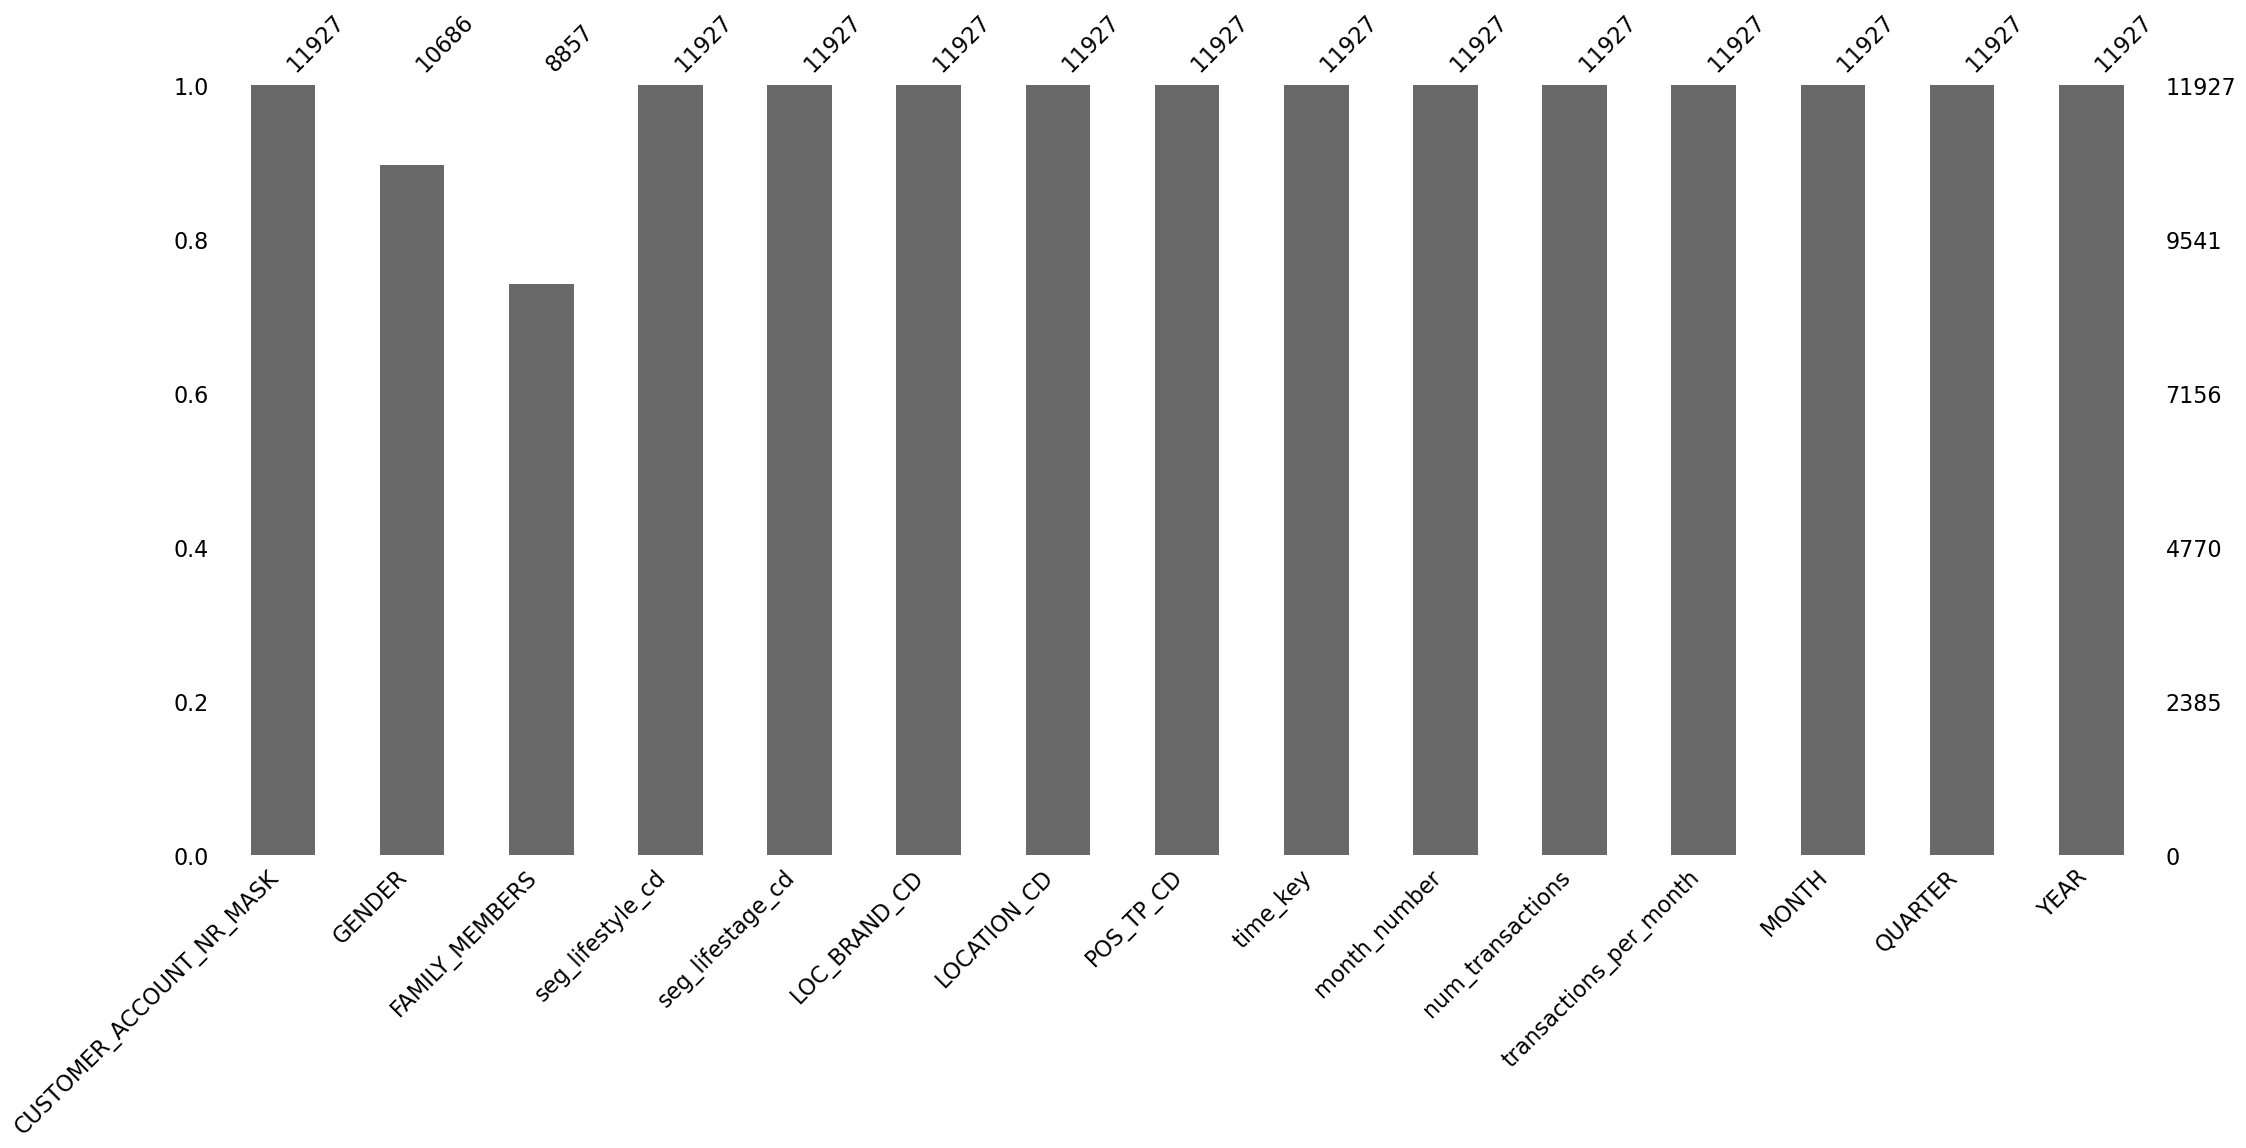

In [13]:
# Gives a bar chart of the missing values
msno.bar(df)

In [14]:
df.isnull().any()

CUSTOMER_ACCOUNT_NR_MASK    False
GENDER                       True
FAMILY_MEMBERS               True
seg_lifestyle_cd            False
seg_lifestage_cd            False
LOC_BRAND_CD                False
LOCATION_CD                 False
POS_TP_CD                   False
time_key                    False
month_number                False
num_transactions            False
transactions_per_month      False
MONTH                       False
QUARTER                     False
YEAR                        False
dtype: bool

In [15]:
df.isna().sum()

CUSTOMER_ACCOUNT_NR_MASK       0
GENDER                      1241
FAMILY_MEMBERS              3070
seg_lifestyle_cd               0
seg_lifestage_cd               0
LOC_BRAND_CD                   0
LOCATION_CD                    0
POS_TP_CD                      0
time_key                       0
month_number                   0
num_transactions               0
transactions_per_month         0
MONTH                          0
QUARTER                        0
YEAR                           0
dtype: int64

In [16]:
df.groupby(['MONTH'])['GENDER'].apply(lambda x: x.isnull().sum())

MONTH
1     220
2     101
3      83
4      68
5      96
6      94
7      59
8      74
9      88
10    115
11    113
12    130
Name: GENDER, dtype: int64

<AxesSubplot:>

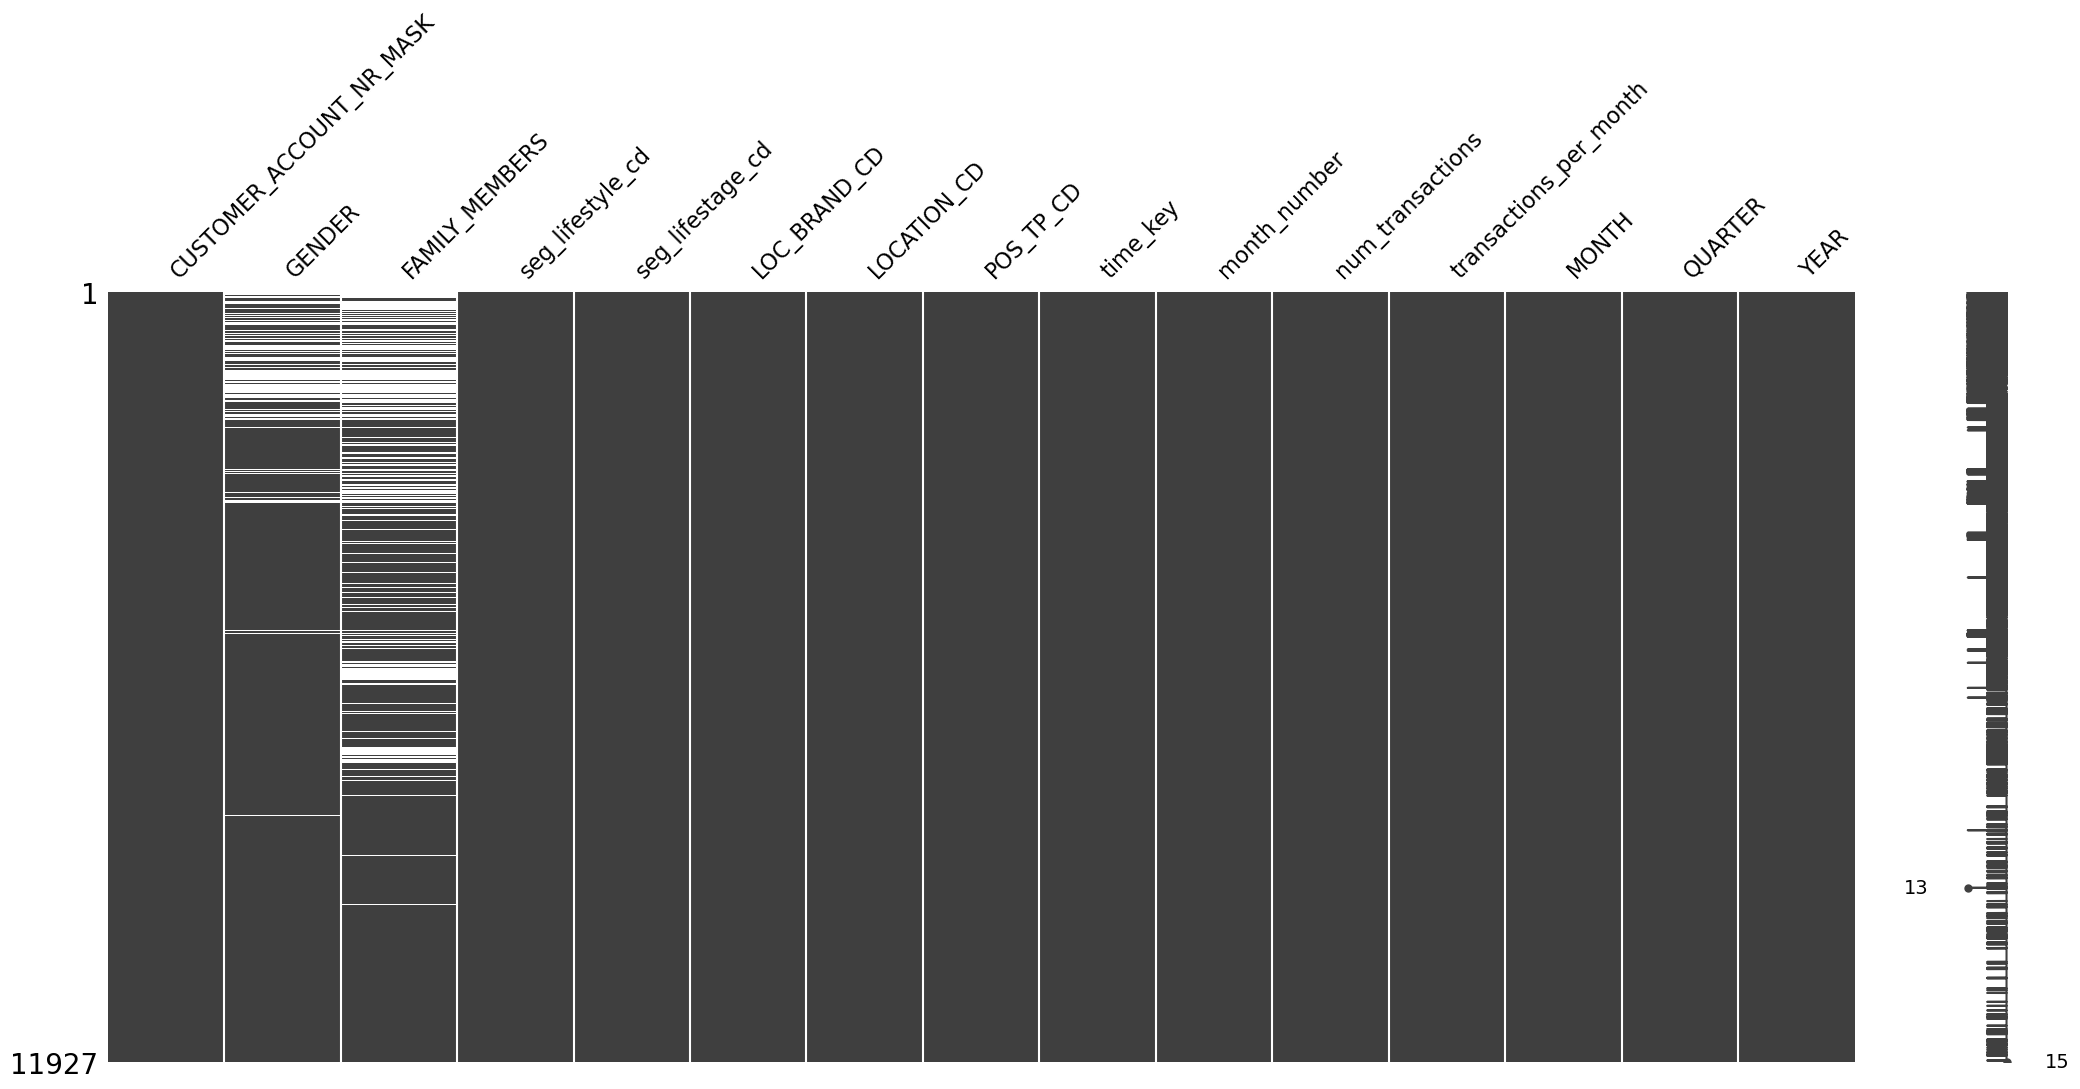

In [17]:
# Gives positional information of the missing values
msno.matrix(df)

<AxesSubplot:>

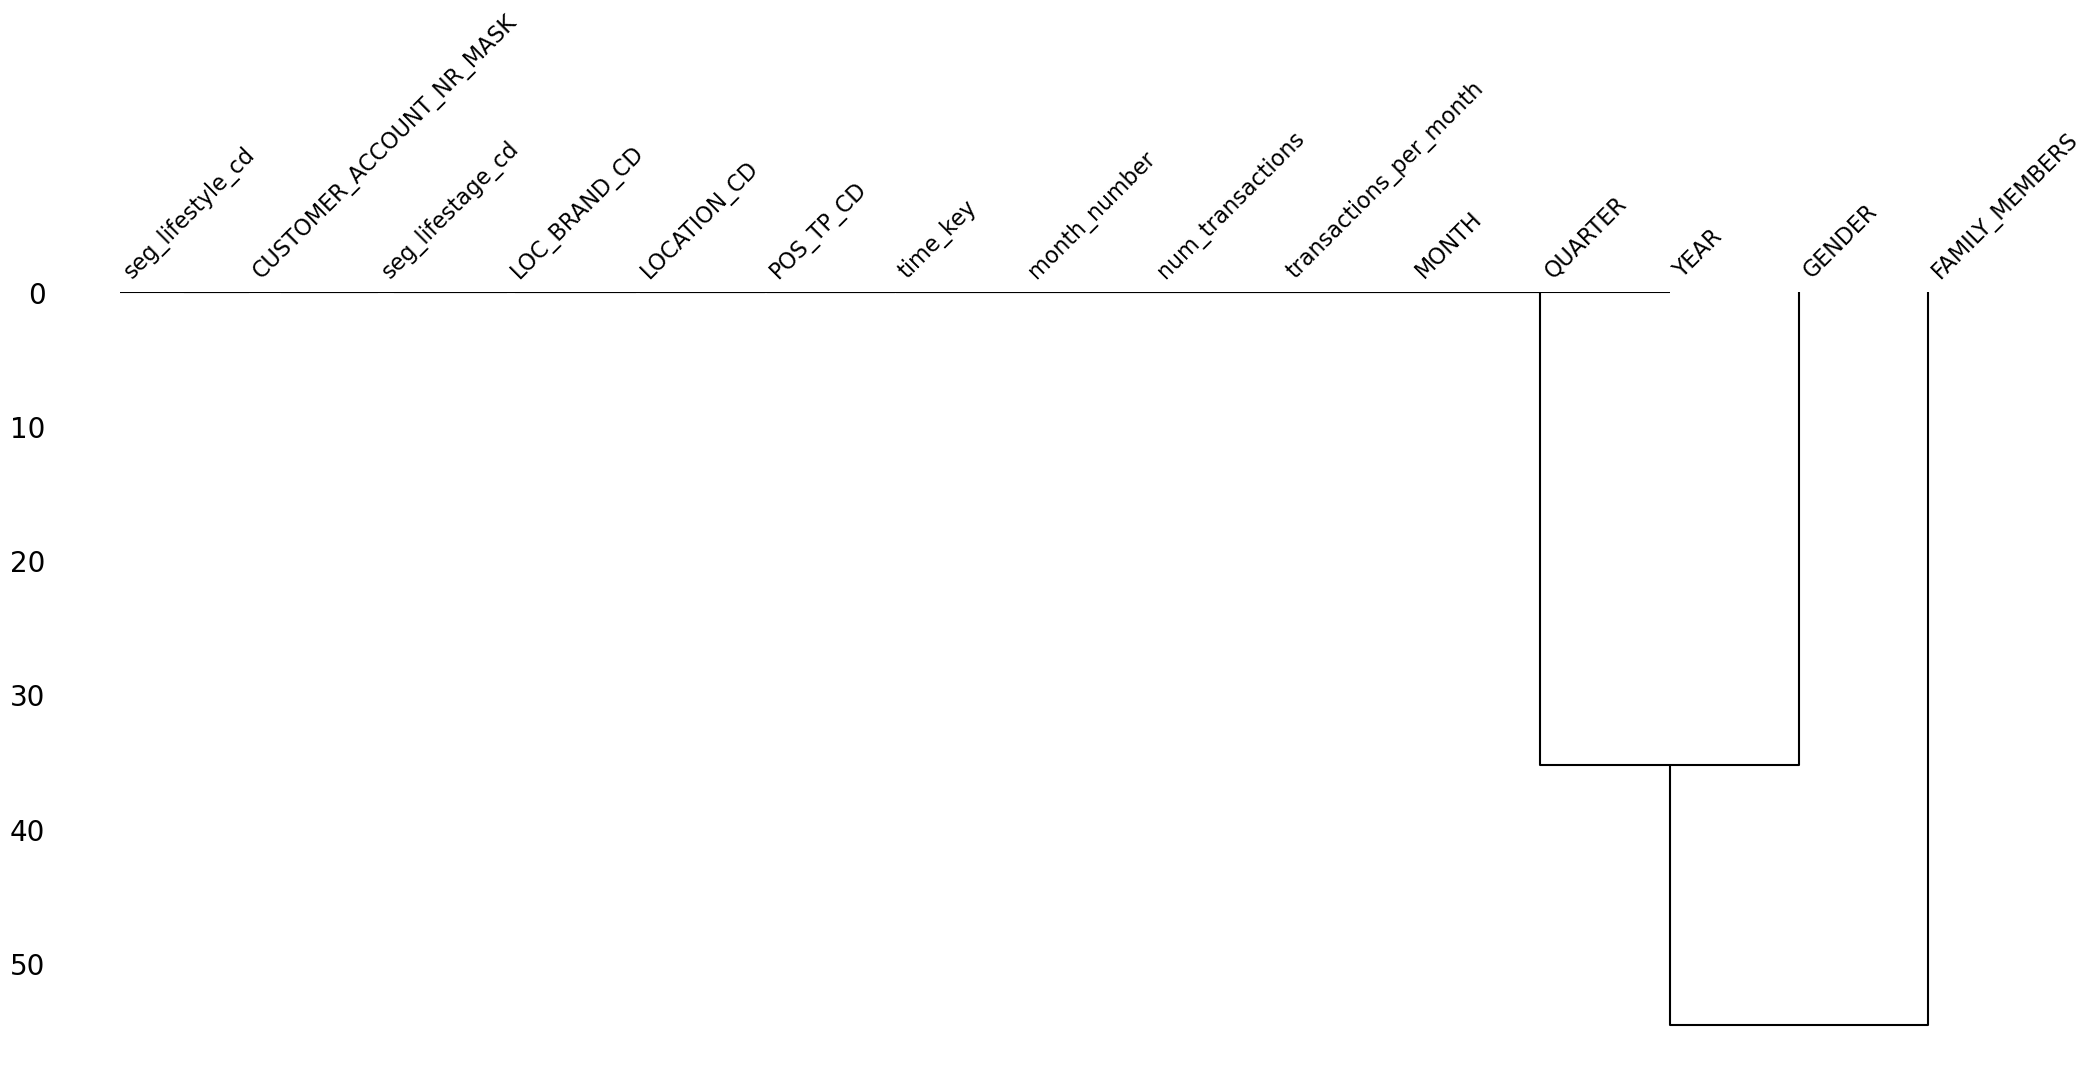

In [18]:
msno.dendrogram(df)

In [19]:
df['GENDER'].replace('M', 0,inplace=True)
df['GENDER'].replace('F', 1,inplace=True)

In [20]:
df = df.drop(columns=['POS_TP_CD'])
df

,CUSTOMER_ACCOUNT_NR_MASK,GENDER,FAMILY_MEMBERS,seg_lifestyle_cd,seg_lifestage_cd,LOC_BRAND_CD,LOCATION_CD,time_key,month_number,num_transactions,transactions_per_month,MONTH,QUARTER,YEAR
0,133624448,1.00,<NA>,4,6,302,4321,2022-12-30,1,1,1,12,4,2022
2,133586350,0.00,<NA>,4,6,302,3603,2022-12-08,1,2,2,12,4,2022
11,133537444,0.00,1,4,6,302,4696,2022-12-04,1,1,1,12,4,2022
15,133329843,1.00,2,4,6,303,261,2022-12-05,1,8,8,12,4,2022
92,133324441,NaN,<NA>,4,6,303,379,2022-12-30,1,1,1,12,4,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065142,44637,1.00,1,3,5,303,1056,2021-03-06,22,9,0,3,1,2021
4065182,37912,0.00,7,2,4,303,471,2021-01-06,24,130,5,1,1,2021
4065761,36467,0.00,5,2,4,303,214,2021-01-28,24,34,1,1,1,2021
4065936,31655,1.00,3,2,4,303,222,2021-01-12,24,44,1,1,1,2021


In [21]:
df = df.drop(columns=['time_key'])

In [168]:
df1 = df
df1[['FAMILY_MEMBERS']] = df1[['FAMILY_MEMBERS']].fillna(value=999)

In [169]:
testing_data = df1[df1['GENDER'].isnull()]
training_data = df1[df1['GENDER'].notnull()]

### First we test with data without MV

In [170]:
X_train = training_data.drop(['GENDER'], axis=1)
y_train = training_data['GENDER']

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.30, random_state=21)

In [180]:
error_rate = []
# Will take some time
for i in range(1,131):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))



Text(0, 0.5, 'Error Rate')

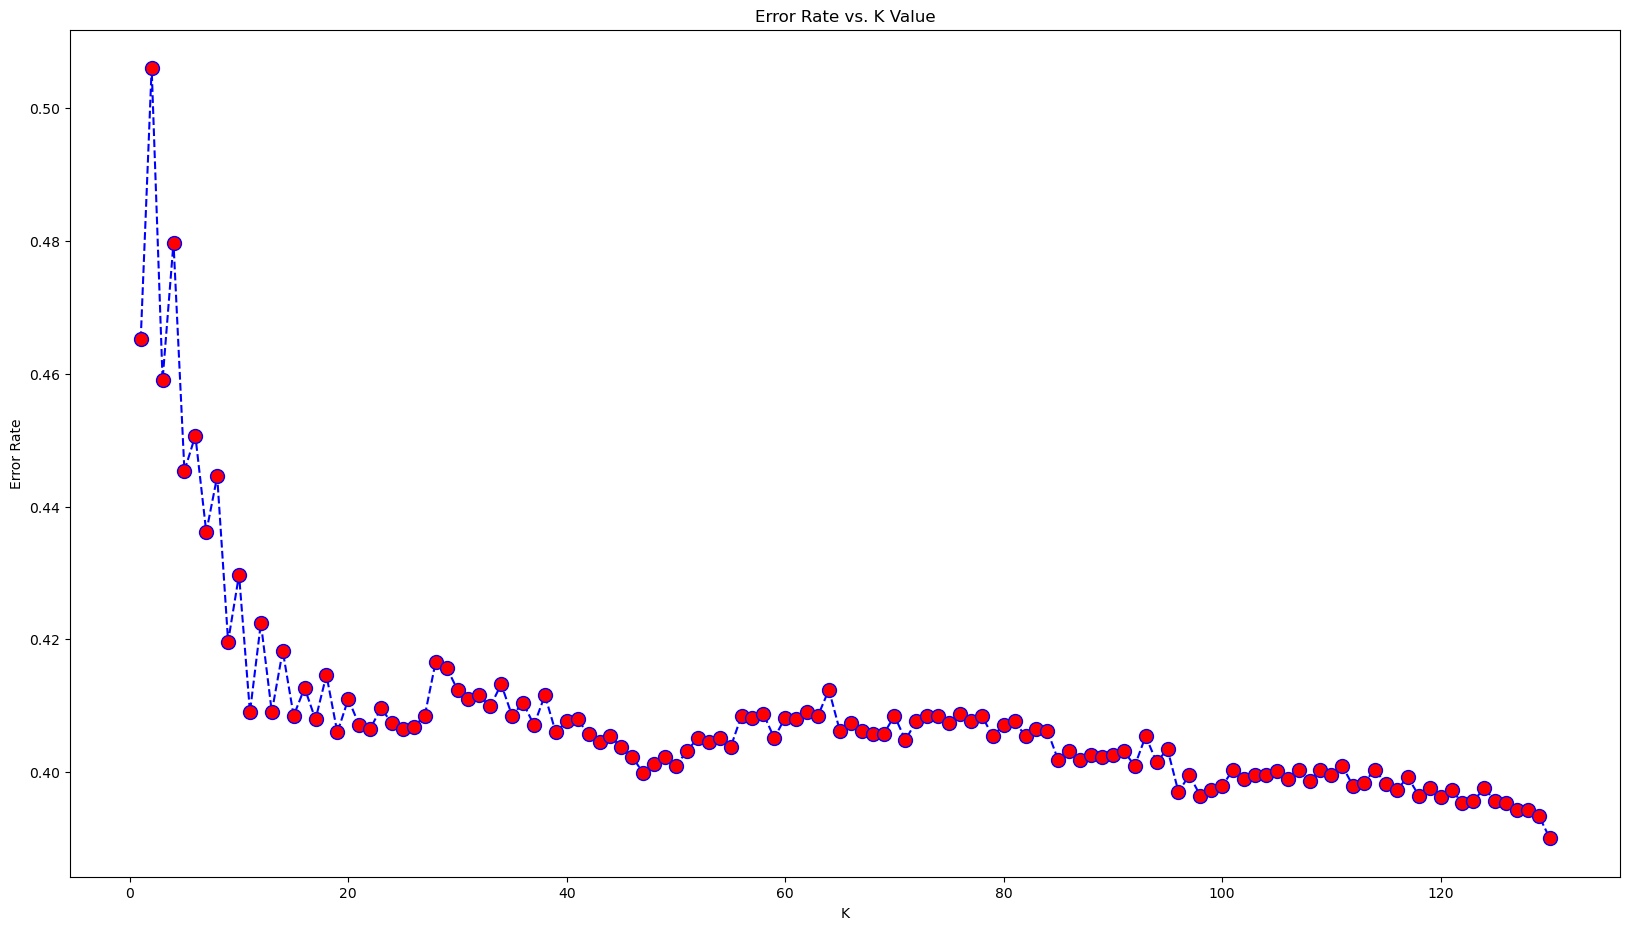

In [181]:
plt.figure(figsize=(20,11))
plt.plot(range(1,131),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [182]:
knn = KNeighborsClassifier(n_neighbors=130)
knn.fit(X_train, y_train)

# Check for Random forest model
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.54      0.29      0.38      1459
         1.0       0.63      0.83      0.72      2120

    accuracy                           0.61      3579
   macro avg       0.58      0.56      0.55      3579
weighted avg       0.59      0.61      0.58      3579



In [27]:
from sklearn.ensemble import RandomForestClassifier
#Fit our Logistic Regression
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
#Fit our Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
# Can get more performance metrics from classification_report
from sklearn.metrics import classification_report
# Check for Random forest model
y_pred_lr = lr.predict(X_train)
print(classification_report(y_train, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      2908
         1.0       0.61      1.00      0.76      4572

    accuracy                           0.61      7480
   macro avg       0.31      0.50      0.38      7480
weighted avg       0.37      0.61      0.46      7480



C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
# Can get more performance metrics from classification_report
from sklearn.metrics import classification_report
# Check for Random forest model
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1263
         1.0       0.61      1.00      0.75      1943

    accuracy                           0.61      3206
   macro avg       0.30      0.50      0.38      3206
weighted avg       0.37      0.61      0.46      3206



C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
# Check for Random forest model
y_pred_rf = rf.predict(X_train)
print(classification_report(y_train, y_pred_rf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2908
         1.0       1.00      1.00      1.00      4572

    accuracy                           1.00      7480
   macro avg       1.00      1.00      1.00      7480
weighted avg       1.00      1.00      1.00      7480



In [36]:
# Check for Random forest model
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.49      0.33      0.39      1263
         1.0       0.64      0.78      0.70      1943

    accuracy                           0.60      3206
   macro avg       0.57      0.55      0.55      3206
weighted avg       0.58      0.60      0.58      3206



In [37]:
# Check for Random forest model
y_pred_knn = knn.predict(X_train)
print(classification_report(y_train, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.67      0.53      0.59      2908
         1.0       0.73      0.83      0.78      4572

    accuracy                           0.71      7480
   macro avg       0.70      0.68      0.69      7480
weighted avg       0.71      0.71      0.71      7480



In [38]:
# Check for Random forest model
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.42      0.33      0.37      1263
         1.0       0.62      0.70      0.66      1943

    accuracy                           0.55      3206
   macro avg       0.52      0.51      0.51      3206
weighted avg       0.54      0.55      0.54      3206



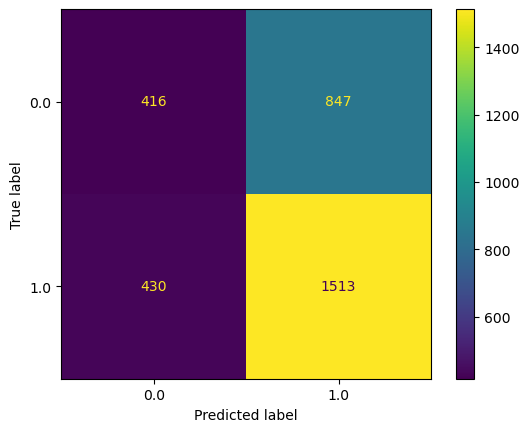

In [39]:
# And we can print the confusion matrix as well
from sklearn.metrics import ConfusionMatrixDisplay
# Check for Light RF model
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test) 

### Now we know that Random Forest has the best F1 Score and we will apply it to predict the missing values

In [40]:
X_train = training_data.drop(['GENDER'], axis=1)
y_train = training_data['GENDER']

rf=RandomForestClassifier()
rf.fit(X_train,y_train)

# Predict the missing values in the 'GENDER' column
X_test = testing_data.drop(['GENDER'], axis=1)
predicted_gender = rf.predict(X_test)

In [41]:
# Assign the predicted values back to the dataframe
df1.loc[df1['GENDER'].isnull(), 'GENDER'] = predicted_gender

In [42]:
df1

,CUSTOMER_ACCOUNT_NR_MASK,GENDER,FAMILY_MEMBERS,seg_lifestyle_cd,seg_lifestage_cd,LOC_BRAND_CD,LOCATION_CD,month_number,num_transactions,transactions_per_month,MONTH,QUARTER,YEAR
0,133624448,1.00,999,4,6,302,4321,1,1,1,12,4,2022
2,133586350,0.00,999,4,6,302,3603,1,2,2,12,4,2022
11,133537444,0.00,1,4,6,302,4696,1,1,1,12,4,2022
15,133329843,1.00,2,4,6,303,261,1,8,8,12,4,2022
92,133324441,0.00,999,4,6,303,379,1,1,1,12,4,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065142,44637,1.00,1,3,5,303,1056,22,9,0,3,1,2021
4065182,37912,0.00,7,2,4,303,471,24,130,5,1,1,2021
4065761,36467,0.00,5,2,4,303,214,24,34,1,1,1,2021
4065936,31655,1.00,3,2,4,303,222,24,44,1,1,1,2021


In [43]:
df1.isna().sum()

CUSTOMER_ACCOUNT_NR_MASK    0
GENDER                      0
FAMILY_MEMBERS              0
seg_lifestyle_cd            0
seg_lifestage_cd            0
LOC_BRAND_CD                0
LOCATION_CD                 0
month_number                0
num_transactions            0
transactions_per_month      0
MONTH                       0
QUARTER                     0
YEAR                        0
dtype: int64

### Lets do the same for Family members

In [44]:
df1['FAMILY_MEMBERS'].replace(999, np.nan, inplace=True)

In [45]:
df1.isna().sum()

CUSTOMER_ACCOUNT_NR_MASK       0
GENDER                         0
FAMILY_MEMBERS              3070
seg_lifestyle_cd               0
seg_lifestage_cd               0
LOC_BRAND_CD                   0
LOCATION_CD                    0
month_number                   0
num_transactions               0
transactions_per_month         0
MONTH                          0
QUARTER                        0
YEAR                           0
dtype: int64

In [46]:
counts = df1['FAMILY_MEMBERS'].value_counts().sort_values(ascending=False)
counts

2     1987
3     1715
1     1537
4     1505
0     1213
5      513
6      164
7       77
8       32
11      30
9       15
14      14
10      11
12      10
13       5
17       4
33       4
15       3
74       2
64       2
21       2
19       1
82       1
66       1
63       1
73       1
52       1
30       1
61       1
45       1
26       1
60       1
93       1
Name: FAMILY_MEMBERS, dtype: Int64

#### We are considering all numbers above 13 as outliers or wrong data and we are going to replace as Nan and predict it 

In [48]:
df1.loc[df1['FAMILY_MEMBERS'] > 8, 'FAMILY_MEMBERS'] = np.nan


In [49]:
counts = df1['FAMILY_MEMBERS'].value_counts().sort_values(ascending=False)
counts

2    1987
3    1715
1    1537
4    1505
0    1213
5     513
6     164
7      77
8      32
Name: FAMILY_MEMBERS, dtype: Int64

In [50]:
testing_data = df1[df1['FAMILY_MEMBERS'].isnull()]
training_data = df1[df1['FAMILY_MEMBERS'].notnull()]

In [51]:
training_data

,CUSTOMER_ACCOUNT_NR_MASK,GENDER,FAMILY_MEMBERS,seg_lifestyle_cd,seg_lifestage_cd,LOC_BRAND_CD,LOCATION_CD,month_number,num_transactions,transactions_per_month,MONTH,QUARTER,YEAR
11,133537444,0.00,1,4,6,302,4696,1,1,1,12,4,2022
15,133329843,1.00,2,4,6,303,261,1,8,8,12,4,2022
161,133253666,1.00,0,4,6,143,1,1,2,2,12,4,2022
458,133123114,0.00,3,3,6,143,5,2,1,0,11,4,2022
459,133103200,1.00,3,4,6,302,6173,1,3,3,12,4,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065142,44637,1.00,1,3,5,303,1056,22,9,0,3,1,2021
4065182,37912,0.00,7,2,4,303,471,24,130,5,1,1,2021
4065761,36467,0.00,5,2,4,303,214,24,34,1,1,1,2021
4065936,31655,1.00,3,2,4,303,222,24,44,1,1,1,2021


In [52]:
def calculate_entropy(labels):
    class_counts = labels.value_counts()
    probabilities = class_counts / len(labels)
    entropy = -sum(probabilities * probabilities.apply(lambda x: 0 if x == 0 else x * np.log2(x)))
    return entropy


def bin_data(data, num_bins):
    binned_labels = pd.qcut(data, num_bins, labels=False, duplicates='drop')
    return binned_labels


num_bins = 3

training_data.reset_index(drop=True, inplace=True)  # Resetting the index of the DataFrame

binned_labels = bin_data(training_data['FAMILY_MEMBERS'], num_bins)

# Check if the number of bin labels matches the number of rows in the DataFrame
if len(binned_labels) != len(training_data):
    raise ValueError("Number of bin labels does not match the number of rows in the DataFrame")

training_data['FamilyMembersBins'] = binned_labels

# Print the range of each bin
for i in range(num_bins):
    bin_range = (training_data[training_data['FamilyMembersBins'] == i]['FAMILY_MEMBERS'].min(),
                 training_data[training_data['FamilyMembersBins'] == i]['FAMILY_MEMBERS'].max())
    print(f"Bin {i}: {bin_range}")

print(training_data)

Bin 0: (0, 2)
Bin 1: (3, 3)
Bin 2: (4, 8)
      CUSTOMER_ACCOUNT_NR_MASK  GENDER  FAMILY_MEMBERS  seg_lifestyle_cd  \
0                    133537444    0.00               1                 4   
1                    133329843    1.00               2                 4   
2                    133253666    1.00               0                 4   
3                    133123114    0.00               3                 3   
4                    133103200    1.00               3                 4   
...                        ...     ...             ...               ...   
8738                     44637    1.00               1                 3   
8739                     37912    0.00               7                 2   
8740                     36467    0.00               5                 2   
8741                     31655    1.00               3                 2   
8742                      9450    1.00               3                 2   

      seg_lifestage_cd  LOC_BRAND_CD  LOCATIO

C:\Users\cmigu\AppData\Local\Temp\ipykernel_4040\1918411325.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['FamilyMembersBins'] = binned_labels


In [53]:
training_data['FamilyMembersBins'].value_counts().sort_values(ascending=False)

0    4737
2    2291
1    1715
Name: FamilyMembersBins, dtype: int64

In [54]:
training_data.drop(['FAMILY_MEMBERS'],inplace=True ,axis=1)

C:\Users\cmigu\AppData\Local\Temp\ipykernel_4040\566569987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.drop(['FAMILY_MEMBERS'],inplace=True ,axis=1)


In [55]:
X_train = training_data.drop(['FamilyMembersBins'], axis=1)
y_train = training_data['FamilyMembersBins']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.30, random_state=21)

In [60]:
# import XGBoost
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

#Fit our Random Forest
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

#Fit our Logistic Regression
lr=LogisticRegression()
lr.fit(X_train,y_train)

#Fit our Knn
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

xgb = XGBClassifier(random_state=0)
xgb.fit(X_train, y_train)

nb = GaussianNB()
nb.fit(X_train, y_train)

ada = AdaBoostClassifier(base_estimator = dt, random_state=42)
ada.fit(X_train, y_train);

C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [61]:
# Check for LR model
y_pred_lr = lr.predict(X_train)
print(classification_report(y_train, y_pred_lr))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70      3288
           1       0.00      0.00      0.00      1202
           2       0.00      0.00      0.00      1630

    accuracy                           0.54      6120
   macro avg       0.18      0.33      0.23      6120
weighted avg       0.29      0.54      0.38      6120



C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
# Check for LR model
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71      1449
           1       0.00      0.00      0.00       513
           2       0.00      0.00      0.00       661

    accuracy                           0.55      2623
   macro avg       0.18      0.33      0.24      2623
weighted avg       0.31      0.55      0.39      2623



C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
# Check for Random forest model
y_pred_rf = rf.predict(X_train)
print(classification_report(y_train, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3288
           1       1.00      1.00      1.00      1202
           2       1.00      1.00      1.00      1630

    accuracy                           1.00      6120
   macro avg       1.00      1.00      1.00      6120
weighted avg       1.00      1.00      1.00      6120



In [64]:
# Check for Random forest model
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.59      0.80      0.68      1449
           1       0.22      0.08      0.11       513
           2       0.34      0.24      0.28       661

    accuracy                           0.52      2623
   macro avg       0.38      0.37      0.36      2623
weighted avg       0.45      0.52      0.47      2623



In [65]:
# Check for Random forest model
y_pred_knn = knn.predict(X_train)
print(classification_report(y_train, y_pred_knn))

              precision    recall  f1-score   support

           0       0.65      0.89      0.75      3288
           1       0.53      0.31      0.39      1202
           2       0.64      0.35      0.45      1630

    accuracy                           0.63      6120
   macro avg       0.61      0.52      0.53      6120
weighted avg       0.62      0.63      0.60      6120



In [66]:
# Check for Random forest model
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.58      0.78      0.67      1449
           1       0.21      0.12      0.15       513
           2       0.30      0.18      0.22       661

    accuracy                           0.50      2623
   macro avg       0.36      0.36      0.35      2623
weighted avg       0.44      0.50      0.45      2623



In [67]:
# Check for Random forest model
y_pred_dt = dt.predict(X_train)
print(classification_report(y_train, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3288
           1       1.00      1.00      1.00      1202
           2       1.00      1.00      1.00      1630

    accuracy                           1.00      6120
   macro avg       1.00      1.00      1.00      6120
weighted avg       1.00      1.00      1.00      6120



In [68]:
# Check for Random forest model
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.58      0.55      0.57      1449
           1       0.21      0.21      0.21       513
           2       0.29      0.32      0.31       661

    accuracy                           0.43      2623
   macro avg       0.36      0.36      0.36      2623
weighted avg       0.44      0.43      0.43      2623



In [69]:
# Check for Random forest model
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.60      0.79      0.68      1449
           1       0.24      0.10      0.14       513
           2       0.33      0.25      0.29       661

    accuracy                           0.52      2623
   macro avg       0.39      0.38      0.37      2623
weighted avg       0.46      0.52      0.47      2623



In [70]:
# Check for Naive Bayes model
y_pred_nb = nb.predict(X_test)
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.57      0.95      0.71      1449
           1       0.00      0.00      0.00       513
           2       0.39      0.13      0.19       661

    accuracy                           0.56      2623
   macro avg       0.32      0.36      0.30      2623
weighted avg       0.41      0.56      0.44      2623



C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
# Check for ADABOOST model
y_pred_ada = ada.predict(X_test)
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.59      0.56      0.57      1449
           1       0.22      0.22      0.22       513
           2       0.28      0.31      0.29       661

    accuracy                           0.43      2623
   macro avg       0.36      0.36      0.36      2623
weighted avg       0.44      0.43      0.43      2623



## With KBinsDiscretizer

In [103]:
testing_data = df1[df1['FAMILY_MEMBERS'].isnull()]
training_data = df1[df1['FAMILY_MEMBERS'].notnull()]

In [104]:
from sklearn.preprocessing import KBinsDiscretizer

# Duplicate the 'FAMILY_MEMBERS' column
training_data['FAMILY_MEMBERS_COPY'] = training_data['FAMILY_MEMBERS'].copy()

# Select the column(s) you want to discretize
columns_to_discretize = ['FAMILY_MEMBERS_COPY']

# Specify the number of bins
num_bins = 3

# Create an instance of KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='uniform')

# Fit and transform the selected column(s) using KBinsDiscretizer
training_data[columns_to_discretize] = discretizer.fit_transform(training_data[columns_to_discretize])

# Print the range of each bin
for i in range(num_bins):
    bin_range = (training_data[training_data[columns_to_discretize[0]] == i]['FAMILY_MEMBERS'].min(),
                 training_data[training_data[columns_to_discretize[0]] == i]['FAMILY_MEMBERS'].max())
    print(f"Bin {i}: {bin_range}")

print(training_data)

Bin 0: (0, 2)
Bin 1: (3, 5)
Bin 2: (6, 8)
         CUSTOMER_ACCOUNT_NR_MASK  GENDER  FAMILY_MEMBERS  seg_lifestyle_cd  \
11                      133537444    0.00               1                 4   
15                      133329843    1.00               2                 4   
161                     133253666    1.00               0                 4   
458                     133123114    0.00               3                 3   
459                     133103200    1.00               3                 4   
...                           ...     ...             ...               ...   
4065142                     44637    1.00               1                 3   
4065182                     37912    0.00               7                 2   
4065761                     36467    0.00               5                 2   
4065936                     31655    1.00               3                 2   
4066187                      9450    1.00               3                 2   

         

C:\Users\cmigu\AppData\Local\Temp\ipykernel_4040\3875709104.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['FAMILY_MEMBERS_COPY'] = training_data['FAMILY_MEMBERS'].copy()
C:\Users\cmigu\AppData\Local\Temp\ipykernel_4040\3875709104.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[columns_to_discretize] = discretizer.fit_transform(training_data[columns_to_discretize])


In [105]:
training_data['FAMILY_MEMBERS_COPY'].value_counts().sort_values(ascending=False)

0.00    4737
1.00    3733
2.00     273
Name: FAMILY_MEMBERS_COPY, dtype: int64

In [86]:
X_train = training_data.drop(['FAMILY_MEMBERS','FAMILY_MEMBERS_COPY'], axis=1)
y_train = training_data['FAMILY_MEMBERS_COPY']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=21)

In [91]:
# import XGBoost
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

#Fit our Random Forest
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

#Fit our Logistic Regression
lr=LogisticRegression()
lr.fit(X_train,y_train)

#Fit our Knn
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

xgb = XGBClassifier(random_state=0)
xgb.fit(X_train, y_train)

nb = GaussianNB()
nb.fit(X_train, y_train)

ada = AdaBoostClassifier(base_estimator = dt, random_state=42)
ada.fit(X_train, y_train);

C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [92]:
# Check for LR model
y_pred_lr = lr.predict(X_train)
print(classification_report(y_train, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.54      1.00      0.70      2643
         1.0       0.00      0.00      0.00      2093
         2.0       0.00      0.00      0.00       160

    accuracy                           0.54      4896
   macro avg       0.18      0.33      0.23      4896
weighted avg       0.29      0.54      0.38      4896



C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
# Check for LR model
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.53      1.00      0.69       645
         1.0       0.00      0.00      0.00       539
         2.0       0.00      0.00      0.00        40

    accuracy                           0.53      1224
   macro avg       0.18      0.33      0.23      1224
weighted avg       0.28      0.53      0.36      1224



C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
# Check for Random forest model
y_pred_rf = rf.predict(X_train)
print(classification_report(y_train, y_pred_rf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2643
         1.0       1.00      1.00      1.00      2093
         2.0       1.00      1.00      1.00       160

    accuracy                           1.00      4896
   macro avg       1.00      1.00      1.00      4896
weighted avg       1.00      1.00      1.00      4896



In [95]:
# Check for Random forest model
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.59      0.66      0.62       645
         1.0       0.54      0.51      0.52       539
         2.0       0.00      0.00      0.00        40

    accuracy                           0.57      1224
   macro avg       0.38      0.39      0.38      1224
weighted avg       0.55      0.57      0.56      1224



C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
# Check for Random forest model
y_pred_knn = knn.predict(X_train)
print(classification_report(y_train, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.71      0.79      0.75      2643
         1.0       0.69      0.64      0.66      2093
         2.0       0.50      0.01      0.01       160

    accuracy                           0.70      4896
   macro avg       0.63      0.48      0.47      4896
weighted avg       0.69      0.70      0.69      4896



In [97]:
# Check for Random forest model
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.56      0.60      0.58       645
         1.0       0.49      0.48      0.48       539
         2.0       0.00      0.00      0.00        40

    accuracy                           0.53      1224
   macro avg       0.35      0.36      0.36      1224
weighted avg       0.51      0.53      0.52      1224



C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
# Check for Random forest model
y_pred_dt = dt.predict(X_train)
print(classification_report(y_train, y_pred_dt))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2643
         1.0       1.00      1.00      1.00      2093
         2.0       1.00      1.00      1.00       160

    accuracy                           1.00      4896
   macro avg       1.00      1.00      1.00      4896
weighted avg       1.00      1.00      1.00      4896



In [99]:
# Check for Random forest model
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.58      0.54      0.56       645
         1.0       0.49      0.52      0.50       539
         2.0       0.07      0.07      0.07        40

    accuracy                           0.52      1224
   macro avg       0.38      0.38      0.38      1224
weighted avg       0.52      0.52      0.52      1224



In [100]:
# Check for Random forest model
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.60      0.62      0.61       645
         1.0       0.53      0.54      0.53       539
         2.0       0.00      0.00      0.00        40

    accuracy                           0.56      1224
   macro avg       0.37      0.39      0.38      1224
weighted avg       0.55      0.56      0.55      1224



In [101]:
# Check for Naive Bayes model
y_pred_nb = nb.predict(X_test)
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

         0.0       0.61      0.64      0.63       645
         1.0       0.55      0.56      0.55       539
         2.0       0.00      0.00      0.00        40

    accuracy                           0.58      1224
   macro avg       0.39      0.40      0.39      1224
weighted avg       0.56      0.58      0.57      1224



C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
# Check for ADABOOST model
y_pred_ada = ada.predict(X_test)
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

         0.0       0.58      0.55      0.56       645
         1.0       0.48      0.50      0.49       539
         2.0       0.10      0.12      0.11        40

    accuracy                           0.51      1224
   macro avg       0.39      0.39      0.39      1224
weighted avg       0.52      0.51      0.52      1224



## Discretizing manually

In [138]:
testing_data = df1[df1['FAMILY_MEMBERS'].isnull()]
training_data = df1[df1['FAMILY_MEMBERS'].notnull()]

In [139]:
training_data.loc[training_data['FAMILY_MEMBERS'].between(0, 0, 'both'), 'FAMILY_MEMBERS_bin'] = 0
training_data.loc[training_data['FAMILY_MEMBERS'].between(0, 2, 'right'), 'FAMILY_MEMBERS_bin'] = 1
training_data.loc[training_data['FAMILY_MEMBERS'].between(2, 8, 'right'), 'FAMILY_MEMBERS_bin'] = 2

C:\Users\cmigu\AppData\Local\Temp\ipykernel_4040\2952670392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.loc[training_data['FAMILY_MEMBERS'].between(0, 0, 'both'), 'FAMILY_MEMBERS_bin'] = 0


In [122]:
training_data

,CUSTOMER_ACCOUNT_NR_MASK,GENDER,FAMILY_MEMBERS,seg_lifestyle_cd,seg_lifestage_cd,LOC_BRAND_CD,LOCATION_CD,month_number,num_transactions,transactions_per_month,MONTH,QUARTER,YEAR,FAMILY_MEMBERS_bin
11,133537444,0.00,1,4,6,302,4696,1,1,1,12,4,2022,0.00
15,133329843,1.00,2,4,6,303,261,1,8,8,12,4,2022,1.00
161,133253666,1.00,0,4,6,143,1,1,2,2,12,4,2022,0.00
458,133123114,0.00,3,3,6,143,5,2,1,0,11,4,2022,1.00
459,133103200,1.00,3,4,6,302,6173,1,3,3,12,4,2022,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065142,44637,1.00,1,3,5,303,1056,22,9,0,3,1,2021,0.00
4065182,37912,0.00,7,2,4,303,471,24,130,5,1,1,2021,2.00
4065761,36467,0.00,5,2,4,303,214,24,34,1,1,1,2021,2.00
4065936,31655,1.00,3,2,4,303,222,24,44,1,1,1,2021,1.00


In [140]:
training_data['FAMILY_MEMBERS_bin'].value_counts().sort_values(ascending=False)

2.00    4006
1.00    3524
0.00    1213
Name: FAMILY_MEMBERS_bin, dtype: int64

In [141]:
X_train = training_data.drop(['FAMILY_MEMBERS','FAMILY_MEMBERS_bin'], axis=1)
y_train = training_data['FAMILY_MEMBERS_bin']

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=21)

In [143]:
# import XGBoost
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

#Fit our Random Forest
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

#Fit our Knn
knn = KNeighborsClassifier(n_neighbors=38)
knn.fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

xgb = XGBClassifier(random_state=0)
xgb.fit(X_train, y_train)

nb = GaussianNB()
nb.fit(X_train, y_train)

ada = AdaBoostClassifier(base_estimator = dt, random_state=42)
ada.fit(X_train, y_train);

C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [146]:
# Check for Random forest model
y_pred_rf = rf.predict(X_train)
print(classification_report(y_train, y_pred_rf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       972
         1.0       1.00      1.00      1.00      2810
         2.0       1.00      1.00      1.00      3212

    accuracy                           1.00      6994
   macro avg       1.00      1.00      1.00      6994
weighted avg       1.00      1.00      1.00      6994



In [147]:
# Check for Random forest model
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.47      0.18      0.26       241
         1.0       0.48      0.48      0.48       714
         2.0       0.53      0.63      0.58       794

    accuracy                           0.51      1749
   macro avg       0.49      0.43      0.44      1749
weighted avg       0.50      0.51      0.49      1749



In [148]:
# Check for Random forest model
y_pred_knn = knn.predict(X_train)
print(classification_report(y_train, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.61      0.53      0.57       972
         1.0       0.61      0.66      0.63      2810
         2.0       0.70      0.67      0.68      3212

    accuracy                           0.65      6994
   macro avg       0.64      0.62      0.63      6994
weighted avg       0.65      0.65      0.65      6994



In [149]:
# Check for Random forest model
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.45      0.41      0.43       241
         1.0       0.42      0.45      0.43       714
         2.0       0.51      0.50      0.50       794

    accuracy                           0.46      1749
   macro avg       0.46      0.45      0.45      1749
weighted avg       0.46      0.46      0.46      1749



In [150]:
# Check for Random forest model
y_pred_dt = dt.predict(X_train)
print(classification_report(y_train, y_pred_dt))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       972
         1.0       1.00      1.00      1.00      2810
         2.0       1.00      1.00      1.00      3212

    accuracy                           1.00      6994
   macro avg       1.00      1.00      1.00      6994
weighted avg       1.00      1.00      1.00      6994



In [151]:
# Check for Random forest model
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.31      0.34      0.32       241
         1.0       0.44      0.42      0.43       714
         2.0       0.49      0.50      0.50       794

    accuracy                           0.45      1749
   macro avg       0.41      0.42      0.42      1749
weighted avg       0.45      0.45      0.45      1749



In [152]:
# Check for Random forest model
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.62      0.37      0.47       241
         1.0       0.49      0.47      0.48       714
         2.0       0.55      0.63      0.59       794

    accuracy                           0.53      1749
   macro avg       0.55      0.49      0.51      1749
weighted avg       0.53      0.53      0.53      1749



In [153]:
# Check for Naive Bayes model
y_pred_nb = nb.predict(X_test)
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       241
         1.0       0.45      0.44      0.45       714
         2.0       0.53      0.70      0.61       794

    accuracy                           0.50      1749
   macro avg       0.33      0.38      0.35      1749
weighted avg       0.43      0.50      0.46      1749



C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [154]:
# Check for ADABOOST model
y_pred_ada = ada.predict(X_test)
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

         0.0       0.32      0.35      0.33       241
         1.0       0.45      0.44      0.45       714
         2.0       0.49      0.49      0.49       794

    accuracy                           0.45      1749
   macro avg       0.42      0.43      0.42      1749
weighted avg       0.45      0.45      0.45      1749



In [162]:
error_rate = []
# Will take some time
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error Rate')

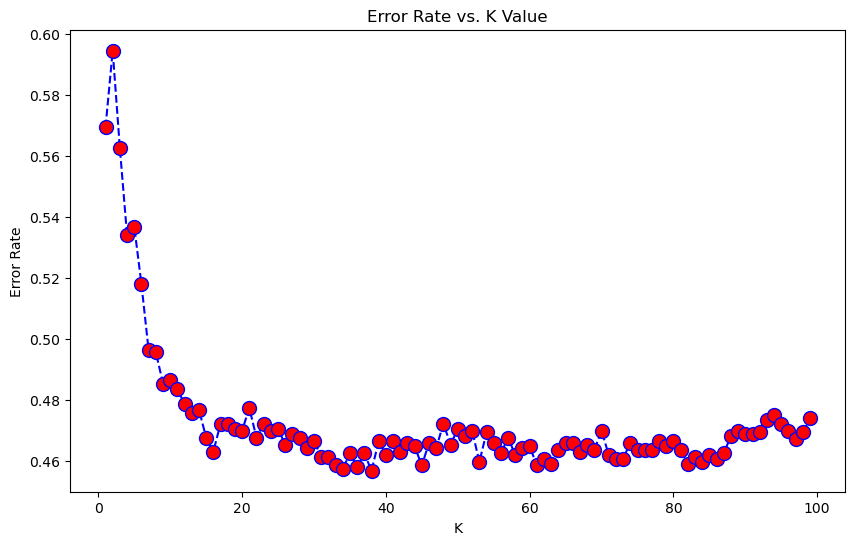

In [163]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [165]:
# NOW WITH K=20
knn = KNeighborsClassifier(n_neighbors=38)
knn.fit(X_train,y_train)

y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))


              precision    recall  f1-score   support

         0.0       0.72      0.36      0.48       241
         1.0       0.49      0.53      0.51       714
         2.0       0.56      0.61      0.59       794

    accuracy                           0.54      1749
   macro avg       0.59      0.50      0.52      1749
weighted avg       0.56      0.54      0.54      1749



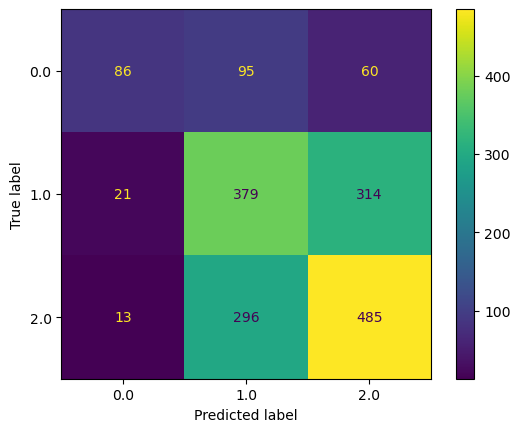

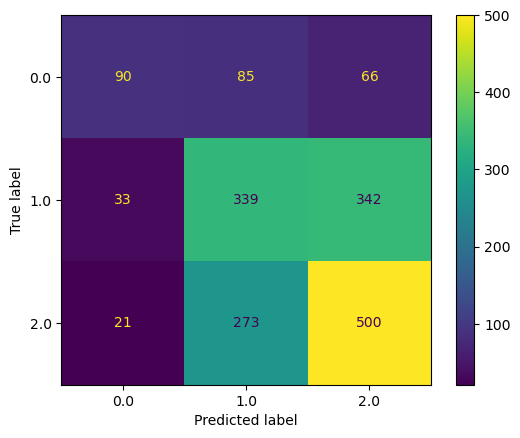

In [167]:
# And we can print the confusion matrix as well
from sklearn.metrics import ConfusionMatrixDisplay
# Check for knn model
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test) 
# Check for knn model
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test) 

In [191]:
notnulls = df1[df1['FAMILY_MEMBERS'].notnull()]

In [186]:
notnulls = df1

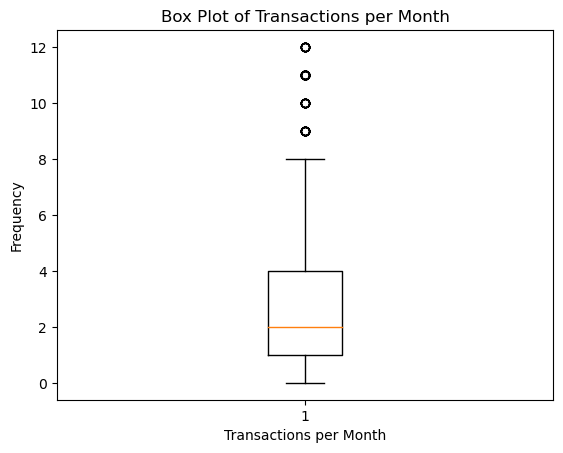

In [193]:
import matplotlib.pyplot as plt

# Create a box plot of the 'transactions_per_month' column
plt.boxplot(notnulls['FAMILY_MEMBERS'])

# Add a title and labels to the plot
plt.title('Box Plot of Transactions per Month')
plt.xlabel('Transactions per Month')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [192]:
notnulls.isna().sum()

CUSTOMER_ACCOUNT_NR_MASK    0
GENDER                      0
FAMILY_MEMBERS              0
seg_lifestyle_cd            0
seg_lifestage_cd            0
LOC_BRAND_CD                0
LOCATION_CD                 0
month_number                0
num_transactions            0
transactions_per_month      0
MONTH                       0
QUARTER                     0
YEAR                        0
dtype: int64

In [196]:
testing_data = df1[df1['FAMILY_MEMBERS'].isnull()]
training_data = df1[df1['FAMILY_MEMBERS'].notnull()]

X_train = training_data.drop(['FAMILY_MEMBERS'], axis=1)
y_train = training_data['FAMILY_MEMBERS']

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.30, random_state=21)

In [203]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Fit models to training dataset
regr_lr = LinearRegression()
regr_lr.fit(X_train, y_train)

regr_kn = KNeighborsRegressor()
regr_kn.fit(X_train, y_train)

regr_rf = RandomForestRegressor()
regr_rf.fit(X_train, y_train)


RandomForestRegressor()

In [204]:
y_pred_train_lr = regr_lr.predict(X_train)
y_pred_train_kn = regr_kn.predict(X_train)
y_pred_train_rf = regr_rf.predict(X_train)

In [205]:

#Root mean squared error
from sklearn.metrics import mean_squared_error
rmse_train_lr=mean_squared_error(y_train, y_pred_train_lr, squared=False)
rmse_train_kn=mean_squared_error(y_train, y_pred_train_kn, squared=False)
rmse_train_rf=mean_squared_error(y_train, y_pred_train_rf, squared=False)

#Mean absolute error
from sklearn.metrics import mean_absolute_error
mae_train_lr=mean_absolute_error(y_train, y_pred_train_lr)
mae_train_kn=mean_absolute_error(y_train, y_pred_train_kn)
mae_train_rf=mean_absolute_error(y_train, y_pred_train_rf)

#Mean absolute percentage error
from sklearn.metrics import mean_absolute_percentage_error
mape_train_lr=mean_absolute_percentage_error(y_train, y_pred_train_lr)
mape_train_kn=mean_absolute_percentage_error(y_train, y_pred_train_kn)
mape_train_rf=mean_absolute_percentage_error(y_train, y_pred_train_rf)

#Median absolute error
from sklearn.metrics import median_absolute_error
medae_train_lr=median_absolute_error(y_train, y_pred_train_lr)
medae_train_kn=median_absolute_error(y_train, y_pred_train_kn)
medae_train_rf=median_absolute_error(y_train, y_pred_train_rf)

#R² score
from sklearn.metrics import r2_score
r2_train_lr=r2_score(y_train, y_pred_train_lr)
r2_train_kn=r2_score(y_train, y_pred_train_kn)
r2_train_rf=r2_score(y_train, y_pred_train_rf)

#Generate a comparison table
metrics_train = pd.DataFrame({
    'RMSE': [rmse_train_lr, rmse_train_kn, rmse_train_rf],
    'MAE': [mae_train_lr, mae_train_kn, mae_train_rf],
    'MAPE': [mape_train_lr, mape_train_kn, mape_train_rf],
    'MEDAE': [medae_train_lr, medae_train_kn, medae_train_rf],
    'R2': [r2_train_lr, r2_train_kn, r2_train_rf],

},index=["LinearRegression","KNeighborsRegressor","RandomForestRegressor"])

metrics_train

C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.

,RMSE,MAE,MAPE,MEDAE,R2
LinearRegression,1.56,1.25,1338316252154027.25,1.11,0.08
KNeighborsRegressor,1.37,1.08,864661693163453.38,1.00,0.30
RandomForestRegressor,0.59,0.46,424891076609060.75,0.39,0.87


In [206]:
y_pred_lr = regr_lr.predict(X_test)
y_pred_kn = regr_kn.predict(X_test)
y_pred_rf = regr_rf.predict(X_test)

In [208]:
#Root mean squared error
rmse_lr=mean_squared_error(y_test, y_pred_lr, squared=False)
rmse_kn=mean_squared_error(y_test, y_pred_kn, squared=False)
rmse_rf=mean_squared_error(y_test, y_pred_rf, squared=False)

#Mean absolute error
mae_lr=mean_absolute_error(y_test, y_pred_lr)
mae_kn=mean_absolute_error(y_test, y_pred_kn)
mae_rf=mean_absolute_error(y_test, y_pred_rf)

#Mean absolute percentage error
mape_lr=mean_absolute_percentage_error(y_test, y_pred_lr)
mape_kn=mean_absolute_percentage_error(y_test, y_pred_kn)
mape_rf=mean_absolute_percentage_error(y_test, y_pred_rf)

#Median absolute error
#The median_absolute_error is particularly interesting because it is robust to outliers. The loss is calculated by taking the median of all absolute differences between the target and the prediction.
medae_lr=median_absolute_error(y_test, y_pred_lr)
medae_kn=median_absolute_error(y_test, y_pred_kn)
medae_rf=median_absolute_error(y_test, y_pred_rf)


#R² score, the coefficient of determination
r2_lr=r2_score(y_test, y_pred_lr)
r2_kn=r2_score(y_test, y_pred_kn)
r2_rf=r2_score(y_test, y_pred_rf)

#Generate a comparison table
metrics_test = pd.DataFrame({
    'RMSE': [rmse_lr, rmse_kn, rmse_rf],
    'MAE': [mae_lr, mae_kn, mae_rf],
    'MAPE': [mape_lr, mape_kn, mape_rf],
    'MEDAE': [medae_lr, medae_kn, medae_rf],
    'R2': [r2_lr, r2_kn, r2_rf],

},index=["LinearRegression","KNeighborsRegressor","RandomForestRegressor"])

metrics_test

C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
C:\Users\cmigu\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.

,RMSE,MAE,MAPE,MEDAE,R2
LinearRegression,1.54,1.25,1402101873015430.50,1.08,0.07
KNeighborsRegressor,1.64,1.31,1091989844837070.75,1.20,-0.06
RandomForestRegressor,1.55,1.24,1227132172961482.50,1.07,0.06


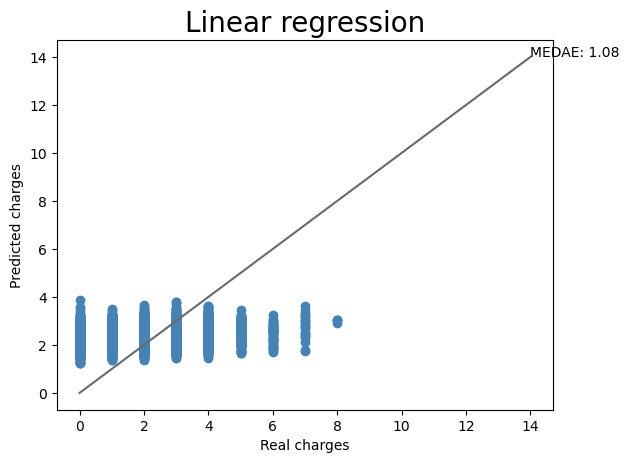

In [218]:
plt.scatter(y_test,y_pred_lr, c="steelblue")
plt.plot( [0,14],[0,14], c='dimgrey' )
plt.xlabel('Real charges')
plt.ylabel('Predicted charges')
plt.annotate('MEDAE: ' + str(round(medae_lr,2)), [14, 14])
plt.title('Linear regression', fontsize=20)
plt.show()

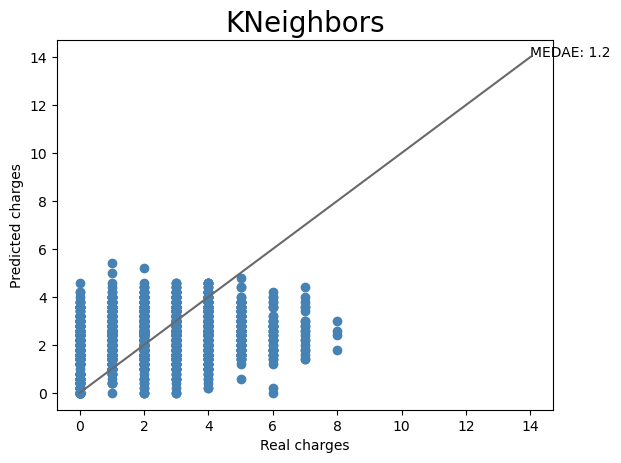

In [219]:
plt.scatter(y_test,y_pred_kn, c="steelblue")
plt.plot( [0,14],[0,14], c='dimgrey' )
plt.xlabel('Real charges')
plt.ylabel('Predicted charges')
plt.title('KNeighbors', fontsize=20)
plt.annotate('MEDAE: ' + str(round(medae_kn,2)), [14, 14])
plt.show()

In [252]:
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np

# Generate some example data
data = np.array([1.2, 2.4, 3.6, 4.8, 5.0, 6.7, 7.9, 9.1, 10.3])

# Reshape the data to have a single feature
data = data.reshape(-1, 1)

# Create the KBinsDiscretizer object
n_bins = 3  # Number of desired bins
strategy = 'entropy'  # Discretization strategy
encoder = KBinsDiscretizer(n_bins=n_bins, strategy=strategy)

# Fit and transform the data
discretized_data = encoder.fit_transform(data)

# Get the transformed data as a 1D array
discretized_data = discretized_data.flatten()

# Print the original and discretized data
print("Original data:", data.flatten())
print("Discretized data:", discretized_data)


ValueError: Valid options for 'strategy' are ('uniform', 'quantile', 'kmeans'). Got strategy='entropy' instead.

In [253]:
pip install pyitlib



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 6.9/6.9 MB 2.4 MB/s eta 0:00:00
  Created wheel for pyitlib: filename=pyitlib-0.2.3-py3-none-any.whl size=29356 sha256=1437a77a0f86806222da87e9c752ae89e2735c05f6b07513460bcd869685cea0
  Stored in directory: c:\users\cmigu\appdata\local\pip\cache\wheels\c4\d1\dc\ac69412c0dc60ee3fc207f07b6f15abda55c70b7b3e96315aa
Successfully built pyitlib
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [255]:
import numpy as np
from pyitlib import discrete_random_variable as drv

# Generate some example data
data = np.array([1.2, 2.4, 3.6, 4.8, 5.0, 6.7, 7.9, 9.1, 10.3])

# Define the number of desired bins
n_bins = 3

# Perform entropy-based discretization
bins = drv.entropy_binning(data, n_bins=n_bins)

# Discretize the data using the obtained bins
discretized_data = np.digitize(data, bins)

# Print the original and discretized data
print("Original data:", data)
print("Discretized data:", discretized_data)


AttributeError: module 'pyitlib.discrete_random_variable' has no attribute 'entropy_binning'

In [256]:
import pandas as pd
import numpy as np
from scipy.stats import entropy

# Generate some example data
data = np.array([1.2, 2.4, 3.6, 4.8, 5.0, 6.7, 7.9, 9.1, 10.3])

# Define the number of desired bins
n_bins = 3

# Calculate the entropy of the original data
original_entropy = entropy(np.histogram(data, bins='auto')[0])

# Perform entropy-based discretization
bins = pd.cut(data, bins=n_bins, retbins=True)[1]

# Discretize the data using the obtained bins
discretized_data = np.digitize(data, bins)

# Calculate the entropy of the discretized data
discretized_entropy = entropy(np.histogram(discretized_data, bins='auto')[0])

# Print the original and discretized data
print("Original data:", data)
print("Discretized data:", discretized_data)
print("Original entropy:", original_entropy)
print("Discretized entropy:", discretized_entropy)


Original data: [ 1.2  2.4  3.6  4.8  5.   6.7  7.9  9.1 10.3]
Discretized data: [1 1 1 2 2 2 3 3 4]
Original entropy: 1.5810937501718234
Discretized entropy: 1.310783678099714
